In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.corpus import stopwords


In [3]:
dfmovies= pd.read_csv(r'C:\Users\flori\Desktop\DATA SCIENCE\LABS\Trabajos\Proyecto_Indiv_1_MLO_Henry\ETL\A-ETLconsignas\MoviesSMALL.csv')

In [20]:
dfmovies.head(1)

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,title,release_year,return
0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Toy Story,1995.0,12.451801


ORIGINAL LANGUAGE

In [10]:
## Analizo la variable lenguaje, me fijo los que hay 
dfmovies['original_language'].unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', nan, 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay',
       'kn', 'eu', 'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu',
       'lb', 'si'], dtype=object)

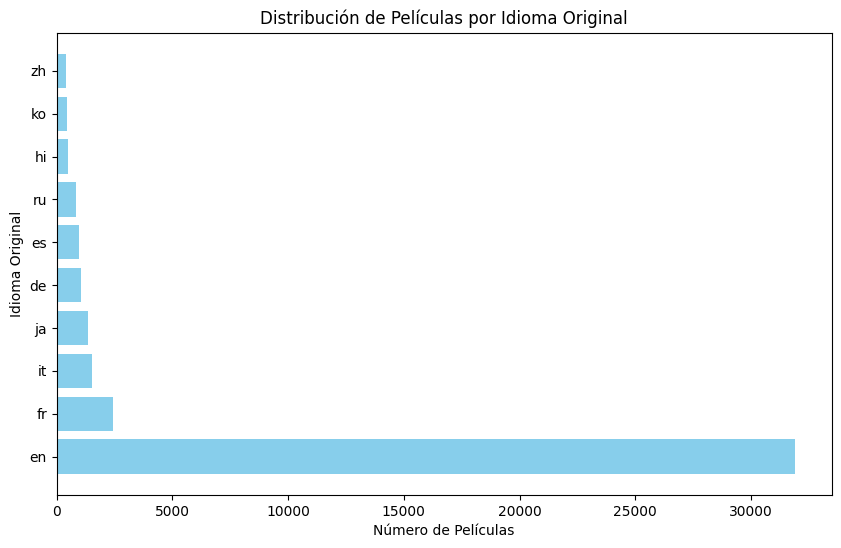

In [18]:
idiomas= dfmovies[['original_language','id']].groupby('original_language').count()
idiomas_sorted= idiomas.sort_values(ascending=False, by='id')
idiomas_sorted10=idiomas_sorted.head(10)

plt.figure(figsize=(10, 6))
plt.barh(idiomas_sorted10.index, idiomas_sorted10['id'], color='skyblue')
plt.xlabel('Número de Películas')
plt.ylabel('Idioma Original')
plt.title('Distribución de Películas por Idioma Original')
plt.show()

El grafico representa los 10 idiomas mas frecuentes, se observa que el ingles es predominante, con una gran diferencia. Grafico por debajo un grafico de torta que representa los porcentajes. 

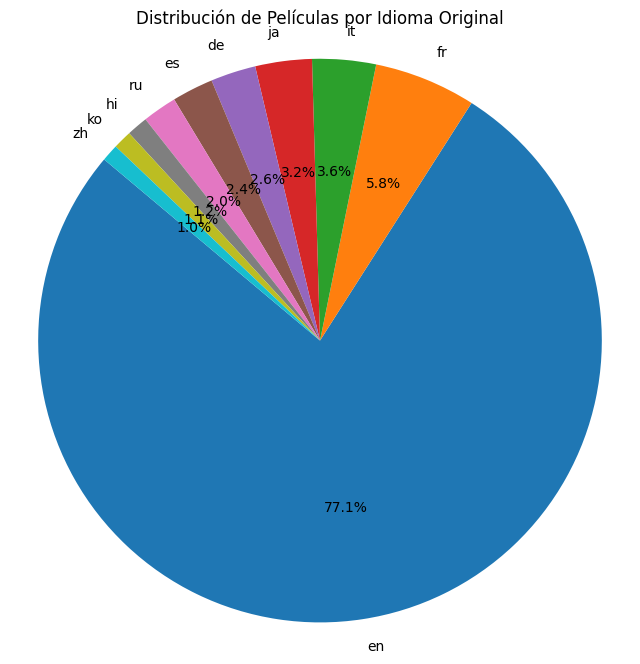

In [19]:
plt.figure(figsize=(8, 8))
plt.pie(idiomas_sorted10['id'], labels=idiomas_sorted10.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Películas por Idioma Original')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

AÑO DE ESTRENO

In [21]:
dfpeliporaños= dfmovies[['release_year', 'id']].groupby('release_year').count().reset_index()
dfpeliporaños.head()

,release_year,id
0,1874.0,1
1,1878.0,1
2,1883.0,1
3,1887.0,1
4,1888.0,2


In [22]:
## elimino los datos de release_year que sean menor a 1895, que es cuando comenzo el cine
dfpeliporaños = dfpeliporaños[dfpeliporaños['release_year'] > 1894.0]
# Me fijo en que año hay mas peliculas, y lo grafico luego
dfpeliporaños.sort_values(by='id', ascending=False)

,release_year,id
129,2014.0,1962
128,2013.0,1881
130,2015.0,1874
127,2012.0,1708
126,2011.0,1645
...,...,...
23,1908.0,6
26,1911.0,6
14,1899.0,5
20,1905.0,4


Miro la cantidad de peliculas por año y veo que mas o menos para el 2000 hay un boom de aumento de produccion de 
 peliculas, que segun el punto anterior el maximo es en 2014 con 1962 peliculas y luego cae el valor, con el las ultimas en 2017

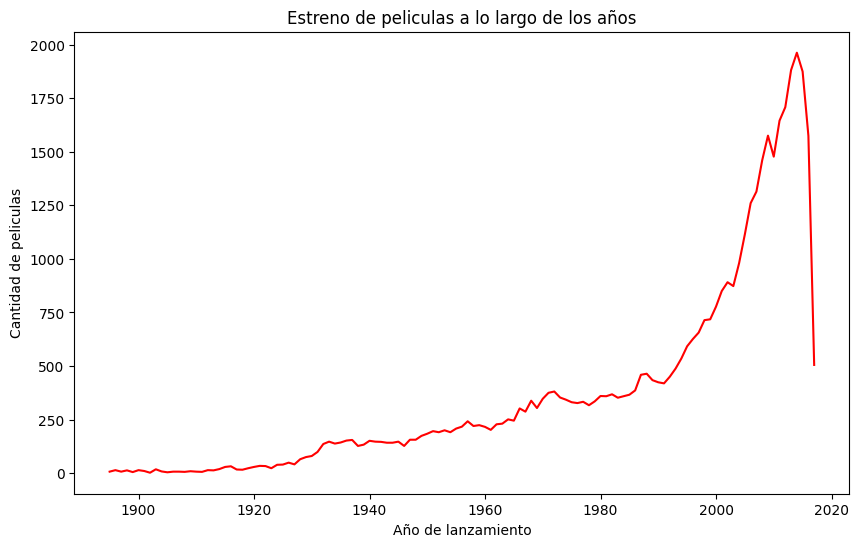

In [36]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=dfpeliporaños, x='release_year', y= 'id', color='red')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de peliculas')
plt.title('Estreno de peliculas a lo largo de los años')
plt.show()



Grafico produccion de peliculas por paises

In [48]:
# Me traigo un DF que cree en el proceso de ETL en donde tengo la cantidad de peliculas por pais ya agrupadas
paises= pd.read_csv(r'C:\Users\flori\Desktop\DATA SCIENCE\LABS\Trabajos\Proyecto_Indiv_1_MLO_Henry\PaisesCANTpelis.csv')
paises.dropna(inplace=True)# le saco los nulos 
# Las ordeno en orden descendente para eligir los 10 paises con mas produccion de peliculas y graficarlos
paises_sorted=paises.sort_values(by='id_original', ascending=False)
paises_top10=paises_sorted.head(10)
paises_top10.head(1)

,name,id_original
154,United States of America,21015.0


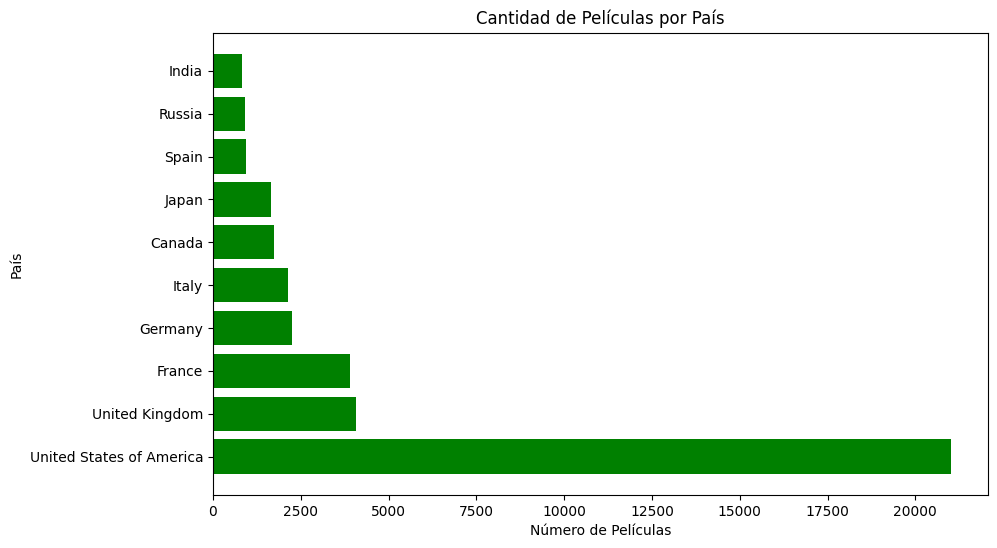

In [50]:
plt.figure(figsize=(10, 6))
plt.barh(paises_top10['name'], paises_top10['id_original'], color='green')
plt.xlabel('Número de Películas')
plt.ylabel('País')
plt.title('Cantidad de Películas por País')
plt.show()

Como vemos este grafico nos muestra la cantidad de peliculas por pais, que a su vez se relacionan con los lenguajes originales que graficamos mas arriba. 

GENEROS

In [65]:
#Me traigo un dataset que arme en el ETL desanidando el DS original para ver cantidad de peliculas segun genero
generos= pd.read_csv(r'C:\Users\flori\Desktop\DATA SCIENCE\LABS\Trabajos\Proyecto_Indiv_1_MLO_Henry\ETL\DESANIDANDO\GenerosPORid.csv')
#Agrupo los generos por nombre, contando cantidad de peliculas
generos2=generos[['id', 'name_genres']].groupby('name_genres').count().reset_index()
#luego los ordeno de manera descendente
generos_sorted=generos2.sort_values(by='id', ascending=False)
# Y me quedo con los 20 primeros
generos_top20=generos_sorted.head(20)
generos_top20.head(1)


,name_genres,id
6,Drama,20072


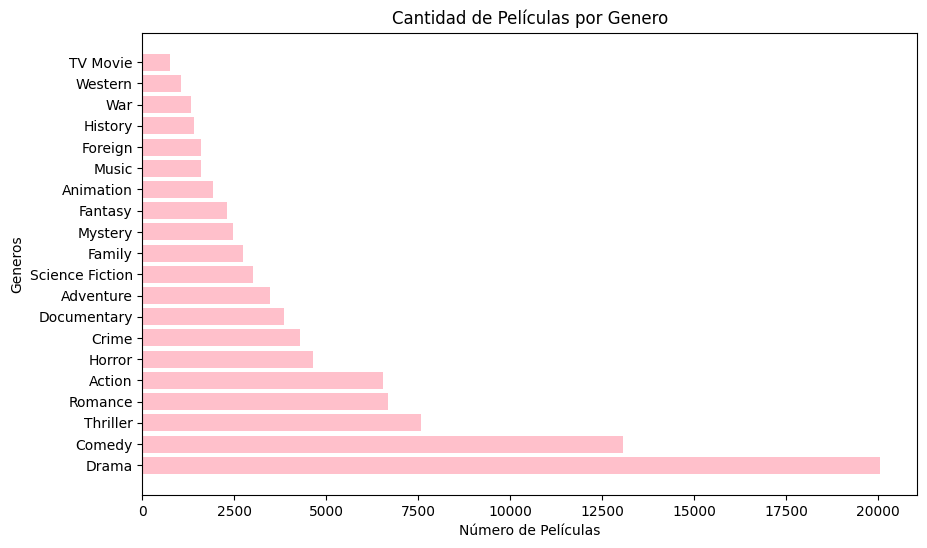

In [66]:
plt.figure(figsize=(10, 6))
plt.barh(generos_top20['name_genres'], generos_top20['id'], color='pink')
plt.xlabel('Número de Películas')
plt.ylabel('Generos')
plt.title('Cantidad de Películas por Genero')
plt.show()

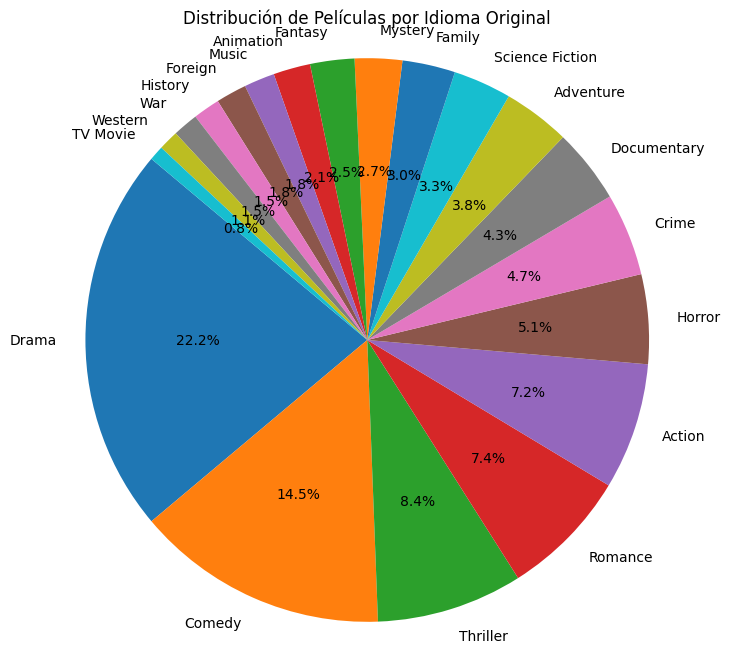

In [67]:
plt.figure(figsize=(8, 8))
plt.pie(generos_top20['id'], labels=generos_top20['name_genres'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Películas por Idioma Original')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Realizo un grafico de barras y uno de torta con los porcentajes. Aca podemos ver que el genero que mas aparece y en mas peliculas es Drama, luego Comedia, luego Thriller, Romance, Accion y Terror

DIRECTORES

In [68]:
df_director= pd.read_csv(r'C:\Users\flori\Desktop\DATA SCIENCE\LABS\Trabajos\Proyecto_Indiv_1_MLO_Henry\ETL\DESANIDANDO\DirectorFUNCION.csv')
df_director.head(1)

,name,budget,release_date,revenue,title,return,return_dire
0,John Lasseter,30000000.0,1995-10-30,373554033.0,Toy Story,12.451801,27.654378


In [69]:
# Agrupo los directores que mas peliculas hicieron
df_dir_pelis= df_director[['name', 'title']].groupby('name').count().reset_index()
ordenados= df_dir_pelis.sort_values(by='title', ascending=False)
ordenados.head()

,name,title
4526,Steven Spielberg,31
4525,Steven Soderbergh,26
194,Alfred Hitchcock,24
4004,Ridley Scott,24
4675,Tim Burton,21


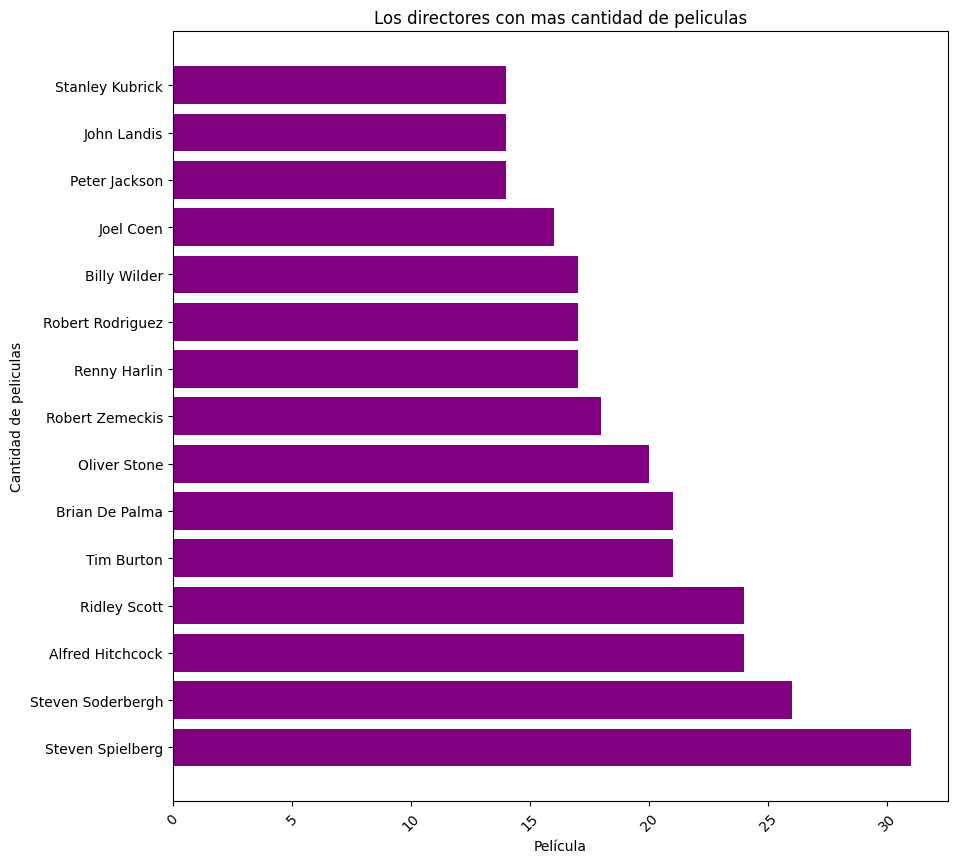

In [70]:
# Realizo gráfico de barras para los 15 directores con mas peliculas
plt.figure(figsize=(10,10))
plt.barh(ordenados['name'].head(15), ordenados['title'].head(15), color='purple')
plt.xticks(rotation=45)
plt.xlabel('Película')
plt.ylabel('Cantidad de peliculas')
plt.title('Los directores con mas cantidad de peliculas')
plt.show()

In [78]:
##me traido el dataset de productoras y peliculas por productora y elijo las que mas peliculas tienen 
dfprodu= pd.read_csv(r'C:\Users\flori\Desktop\DATA SCIENCE\LABS\Trabajos\Proyecto_Indiv_1_MLO_Henry\ETL\DESANIDANDO\EstudiosIDpeli.csv')
dfprodu2= dfprodu[['name', 'id_original']].groupby('name').count().reset_index()
ordenados= dfprodu2.sort_values(by='id_original', ascending=False)
ordenados.head()

,name,id_original
22377,Warner Bros.,1248
13481,Metro-Goldwyn-Mayer (MGM),1075
15623,Paramount Pictures,998
21456,Twentieth Century Fox Film Corporation,834
21753,Universal Pictures,827


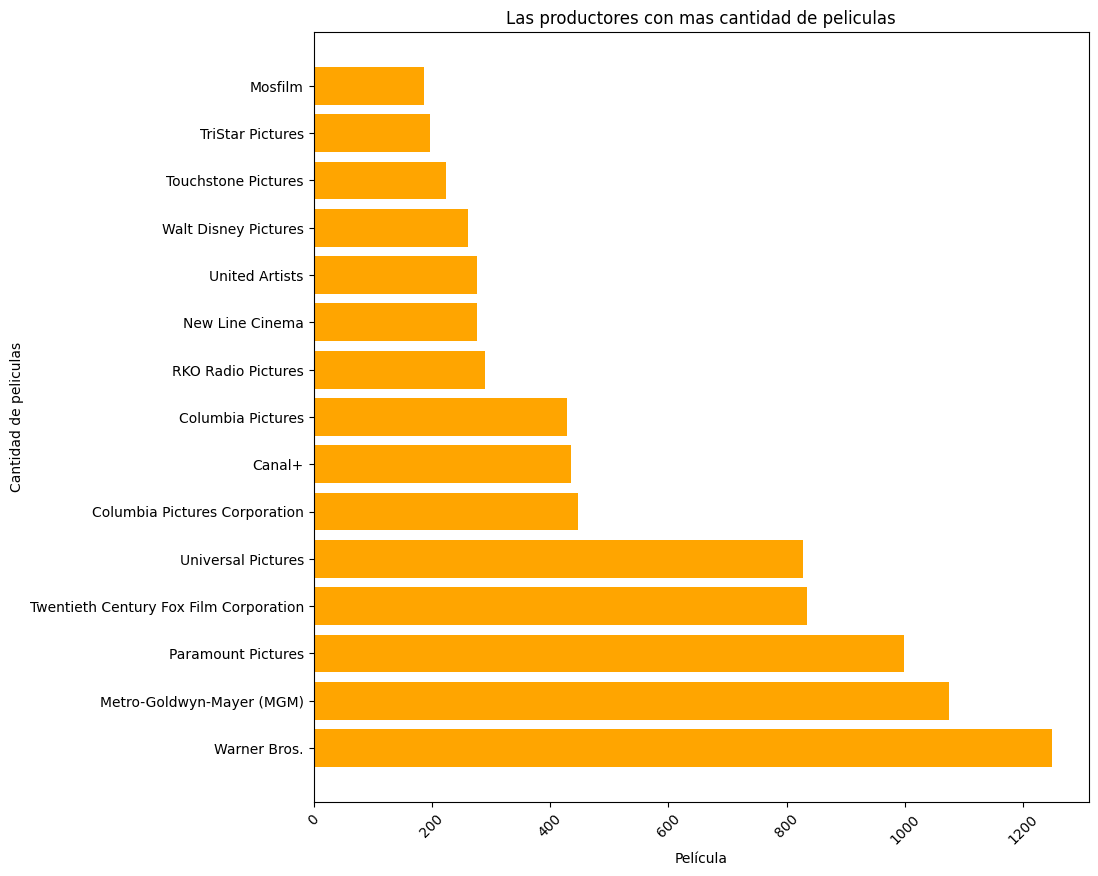

In [80]:
# Realizo gráfico de barras para las 15 productoras con mas peliculas
plt.figure(figsize=(10,10))
plt.barh(ordenados['name'].head(15), ordenados['id_original'].head(15), color='orange')
plt.xticks(rotation=45)
plt.xlabel('Película')
plt.ylabel('Cantidad de peliculas')
plt.title('Las productores con mas cantidad de peliculas')
plt.show()

La productora que mas peliculas tiene es Warner Bros, luego MGM y Paramount Pictures. Se correlaciona tambien con que el pais con mas peliculas es Estados Unidos

Ahora vamos a realizar dos nubes de palabras con las columnas que tienen palabras en su contenido

In [86]:
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\flori\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\flori\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [87]:
df_movies= pd.read_csv(r'C:\Users\flori\Desktop\DATA SCIENCE\LABS\Trabajos\Proyecto_Indiv_1_MLO_Henry\ETL\A-ETLconsignas\MoviesSMALL.csv')
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44936 entries, 0 to 44935
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             44936 non-null  float64
 1   id                 44936 non-null  int64  
 2   original_language  44926 non-null  object 
 3   overview           44029 non-null  object 
 4   popularity         44936 non-null  float64
 5   release_date       44936 non-null  object 
 6   revenue            44936 non-null  float64
 7   runtime            44696 non-null  float64
 8   title              44936 non-null  object 
 9   release_year       44936 non-null  float64
 10  return             10879 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 3.8+ MB


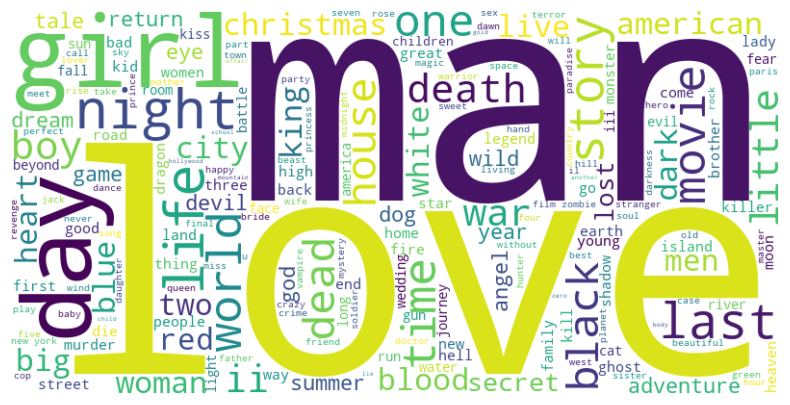

In [89]:
#Realizo una nube de palabras de la columna title, donde puedo observar las palabras que aparecen con mas frecuencia 

# Combinar todos los valores de la columna en una sola cadena de texto
texto = " ".join(df_movies["title"])

# Tokenización y eliminación de stopwords
stop_words = set(stopwords.words("spanish"))
words = nltk.word_tokenize(texto)
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Unir las palabras en una cadena de texto
texto_procesado = " ".join(words)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(texto_procesado)

# Visualizar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()








In [91]:
#me aseguro de que todo el contenido de la columna overview sea string
df_movies["overview"] = df_movies["overview"].astype(str)

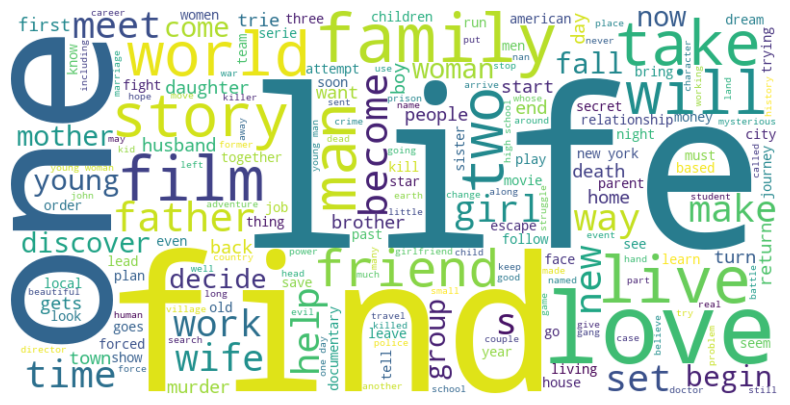

In [90]:
#Realizo lo mismo con la columna overview

texto = " ".join(df_movies["overview"])

# Tokenización y eliminación de stopwords
stop_words = set(stopwords.words("spanish"))
words = nltk.word_tokenize(texto)
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Unir las palabras en una cadena de texto
texto_procesado = " ".join(words)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(texto_procesado)

# Visualizar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

